#Data presentation project

John Holden and Rebecca Ding

December 2020

## Introduction

In this project we conduct initial analysis of a simple *insurance* dataset, comparing the contract sum paid for insurance against applicant characteristics and insurance type.

## Application background

The dataset we will be looking at in this report is **insurance contract data**.

Insurance as an industry is a method of spreading risk. For one individual (or one company), there are some risky events that would cause great loss for the individual. For example, if an employed person crashed their car, they might not be able to afford repairs or replacement, and therefore be left without a car, with potential knock-on effects for their job and personal life.

Insurance is a method of spreading risk across a large pool of people: instead of one individual facing, say, a 1% yearly risk of huge loss, 1000 people can all pay into a fund that will pay for repairs or replacement. The probability that *somebody* in the 1000 will require the insurance is almost certain, but now their loss is small. For each individual, insurance converts the small risk of huge loss into a certainty of small loss (the insurance fee). The reduced uncertainty and limited losses encourages people to seek insurance. Competition between insurers should keep insurance premiums low.

Third-party car insurance is in fact mandatory in UK law, but this analysis still holds, and explains how insurance markets arise where there is no legal obligation. For the purpose of this project we do not need to discuss further questions about how insurance markets continue under the pressures of moral hazard and adverse selection.

A typical insurance policy has relatively standard coverage, but charges consumers different prices according to their risk. For example, health insurance on the free market is much more expensive for an elderly person than a fit young person, because the elderly person faces higher risks - the insurance company is more likely to pay out high sums.

Our dataset has variables for **product**, **region**, **profession**, **age**, **first rate paid**, and then **contract sum** and **closing date**. **Product** is different types of insurance, so we would expect different prices. **Region**, **profession** and **age** can all proxy for risk in different circumstances, so we would expect to be related to price as well. This is unlikely to be a simple relationship: 18-20 year olds are notoriously risky drivers, for example, so we would expect car insurance prices to be higher - but this might not be the same relationship for life insurance.

Setting appropriate prices for different people is a complicated and difficult question, well suited to data science.





## Data exploration: descriptive statistics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import modules and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# Read dataset
insurance = pd.read_csv("/content/drive/MyDrive/data/Insurance.csv")
df = insurance


In [4]:
# Initial exploration
print(df.info())
print(df.isna().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14845 entries, 0 to 14844
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               14845 non-null  int64 
 1   Product          14845 non-null  object
 2   Region           14845 non-null  int64 
 3   Profession       14845 non-null  object
 4   Age              14845 non-null  int64 
 5   First Rate Paid  14845 non-null  object
 6   Contract sum     14845 non-null  object
 7   Closing Date     14845 non-null  object
dtypes: int64(3), object(5)
memory usage: 927.9+ KB
None
ID                 0
Product            0
Region             0
Profession         0
Age                0
First Rate Paid    0
Contract sum       0
Closing Date       0
dtype: int64
   ID Product  Region     Profession  Age First Rate Paid Contract sum  \
0   1    Life     150       Employee   26               Y       25,000   
1   2    Life     150         Farmer   31               

In [5]:
df['ID'].nunique()

14845

There are 8 variables, where Product, Profession, First Rate Paid, Contract sum and Closing date are objects.

There is no missing data across all variables.

We now transform First Rate Paid, Contract sum and Closing date, and then examine the data again.



In [6]:
# Data cleaning
df['Contract sum'] = df['Contract sum'].replace(',','', regex=True)
df['Contract sum'] = df['Contract sum'].astype(int)
df['First Rate Paid'] = df['First Rate Paid'].replace('Y','1', regex=True)
df['First Rate Paid'] = df['First Rate Paid'].replace('N','0', regex=True)
df['Closing Date'] = pd.to_datetime(df['Closing Date'])
df['Closing Date'] = df['Closing Date'].dt.strftime('%m-%Y')

print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14845 entries, 0 to 14844
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               14845 non-null  int64 
 1   Product          14845 non-null  object
 2   Region           14845 non-null  int64 
 3   Profession       14845 non-null  object
 4   Age              14845 non-null  int64 
 5   First Rate Paid  14845 non-null  object
 6   Contract sum     14845 non-null  int64 
 7   Closing Date     14845 non-null  object
dtypes: int64(4), object(4)
memory usage: 927.9+ KB
None
   ID Product  Region     Profession  Age First Rate Paid  Contract sum  \
0   1    Life     150       Employee   26               1         25000   
1   2    Life     150         Farmer   31               0        150000   
2   3    Life     150         Farmer   33               1         15000   
3   4    Life     150         Farmer   33               1         30000   
4   5    L

In [7]:
df['Profession'].value_counts(normalize=True)

Employee             0.378444
Farmer               0.249444
Student              0.172516
Civil servant        0.138094
Executive emplyee    0.039003
Pupil                0.012799
Worker               0.008353
Self-employed        0.001347
Name: Profession, dtype: float64

In [8]:
df.groupby('Product')['Profession'].value_counts(normalize=True)

Product    Profession       
Car        Employee             0.418351
           Farmer               0.265941
           Student              0.186625
           Civil servant        0.088958
           Executive emplyee    0.021462
           Pupil                0.010886
           Worker               0.006532
           Self-employed        0.001244
Health     Employee             0.337129
           Student              0.294640
           Civil servant        0.188003
           Farmer               0.160511
           Executive emplyee    0.008886
           Pupil                0.005276
           Worker               0.004999
           Self-employed        0.000555
Household  Employee             0.364592
           Farmer               0.256792
           Civil servant        0.217353
           Student              0.083260
           Executive emplyee    0.057844
           Pupil                0.009641
           Worker               0.009641
           Self-employed    

In the dataset, the majority of insurance holders are employees (about 38%), 
following by farmers (about 25%).

For car insurance, the distribution across professions almost mirrors the overall dataset distribution of professions.

For health insurance, farmers are underrepresented compared to employees, students and civil servants. For household insurance and life insurance, students are underrepresented. This makes sense intuitively as students tend to be less engaged with these types of products.
 

In [9]:
# Derive new categorical variable, of age
age_conditions = [(df['Age'] <= 24), (25 <= df['Age']) & (df['Age'] <= 55), (df['Age'] >= 56)]
age_categories = ['young', 'adult', 'elder']
df['Age_cat'] = np.select(age_conditions, age_categories, default = np.nan)

df['Age_cat'].value_counts(normalize=True)

adult    0.636713
elder    0.278680
young    0.084608
Name: Age_cat, dtype: float64

In [10]:
df.groupby('Product')['Age_cat'].value_counts(normalize=True)

Product    Age_cat
Car        adult      0.658476
           elder      0.228927
           young      0.112597
Health     adult      0.474313
           elder      0.330464
           young      0.195224
Household  adult      0.588957
           elder      0.396144
           young      0.014899
Life       adult      0.719367
           elder      0.255372
           young      0.025261
Name: Age_cat, dtype: float64

We have generated a **derived variable**, of age category. This converts the continuous ages into a categorical variable. 

By grouping people by their age brackets, we can see clearly how different age groups hold different products. For example, for this insurance company, very few young people hold life insurance. This is consistent with our results above, where we saw that few students, who tend to be young, hold life insurance. Similarly, elders are more likely to engage with household insurance while the young are less likely to be interested in household insurance.

Health insurance stands out as the only category where less than half of policies are held by 'adults'. Many are also held by elders and by the young.
 

## Data quality assessment

After exploring the data, we can assess the data quality.

Accuracy (by measurements): 
- The data should be accurate because all attributes can be verified, and are not measurements that require estimation.
- *Profession type* is the only attribute that requires some interpretation, especially if it is entered by customers without guidance. For example, people may have different interpretations of "student" and "pupil".
- We also note that "regions" have codes rather than names, with no guidance in the source spreadsheet. Presumably these regions were chosen by name when the data was inputted, and have since been converted into codes. In this case there is no reason to doubt their accuracy.

Correctness (by entry):
- It is hard to assess the correctness by entry when we were not involved in the data collection and quality assurance stages.
- Some typos exit in the dataset. For example, profession type "Executive emplyee" misses a letter "o".

Completeness (missing values):
- The data do not contain any missing values.

Consistency (validity and integrity):
- The data look relatively consistent.
- Some transformation was done to prepare the data for further manipulation and analysis.

Redundancy (unnecessary redundancy):
- ID has 14845 unique entries, which matches the number of entries of the dataset. If each ID truly represents a unique insurance holder, there is no redundancy in this specific dataset.
- It is unknown whether the dataset is stored on replication servers.

Timeliness:
- The closing date of the insurance ranges from 1990 to 1996. Implications drawing from this dataset may not be applicable for current and future business needs or decisions.

Relevance:
- The data have included a few applicant characteristics and insurance types, which are relevant to studying the determinants or contributors to the prices of contracts. However, at this level of analysis it is hard to make sense the relationship between some attributes and the prices of contracts (e.g. between Region and Contract sum).
- The dataset provides only a limited number of attributes. Additional applicant features might help with the research, which should not be excluded at such an early stage. 
- We can compare the differences in pricing practices between different insurance products. However, for each insurance product, the attributes needed might be different for building relevant pricing models. For example, health insurance would demand health details of applicants, while car insurance would require the driving history of the applicants. Neither is present in the dataset.

Sampling bias:
- The dataset is unbalanced across a few dimensions, as it leans heavily towards certain product types, regions and professions.

Knowledge on data:
- The data dictionary does not provide sufficient explanation of the attributes, which makes further interpretation and examination harder.

## Data visualisation

### Categorical variables

We begin with the 3 **unordered categorical variables**: *product*, *region* and *profession*.

We visualise these with a *bar chart*, where the height (and area) of each bar represents the count of values. This is an appropriate way of visualising categorical data, as it makes clear that each bar is separate, not a connected series. An alternative is to use a pie chart, which can make it clearer immediately that we are looking at proportions, but has the disadvantage that it is difficult to judge angles with the human eye. Bar charts make it immediately obvious which bars are higher and, therefore, which values are more common.

In [11]:
# Set up categorical variables
df['Product'] = pd.Categorical(df.Product)
df['Region'] = pd.Categorical(df.Region)
df['Profession'] = pd.Categorical(df.Profession)

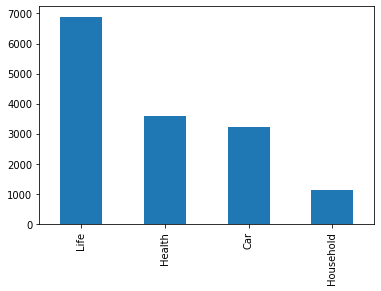

In [12]:
# Insurance product
df['Product'].value_counts().plot(kind='bar')

The most common types of insurance in the dataset is life, followed by health and car, and a relatively small number of household insurance products.

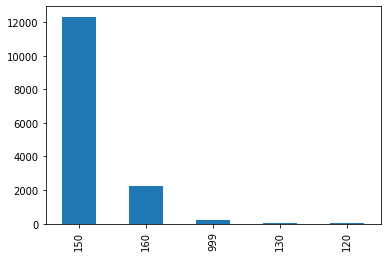

In [13]:
# Region
df['Region'].value_counts().plot(kind='bar')

The regions are difficult to interpret without knowing which number corresponds to which place name (domain knowledge). Region 150 is by far the most common, followed distantly by 160. There are only a small number of 999, 130 and 120.

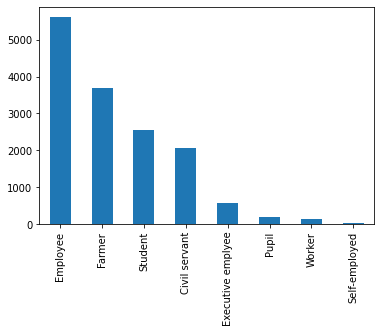

In [14]:
# Profession
df['Profession'].value_counts().plot(kind='bar')

There are 8 professions in the dataset. This is clearly not a random selection of the UK population, with the high proportion of farmers for example, so presumably the insurance company targets specific parts of the population that are overrepresented here.

### Numerical variables

There are 2 numerical variables: age and contract sum. In theory both could be *continuous*: age increases constantly, and contract sum could be measured in pennies or fractions of pennies per year (at least in wholesale insurance). In practice both are measured with a minimum unit so could be considered *discrete*. In the data exploration section we also grouped *age* into 3 buckets, which converts it into an *ordered categorical* variable.

We begin by visualising the numerical variables as a **histogram**. This is similar to bar charts as above, so have the same advantages of being easy to interpret, but also show the x-axis on an ordered scale.

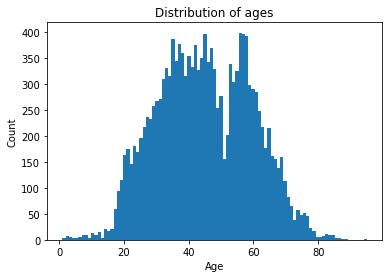

In [15]:
# Age as histogram
binNumber = int(np.max(df.Age))

plt.figure()
plt.hist(df.Age, bins=binNumber)
plt.title('Distribution of ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This histogram shows that ages are distributed roughly in a bell curve. There is however a large dip at around 50 years old. It is not obvious what causes this dip, and it would be interesting to know. One possibility is that this shape can be explained as the combination of two separate distributions, with a centre roughly at 40 and 58 respectively - in the same way a distribution of human height may show a central dip, because it can be split into a distribution of women and men with different means.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Household insurance')

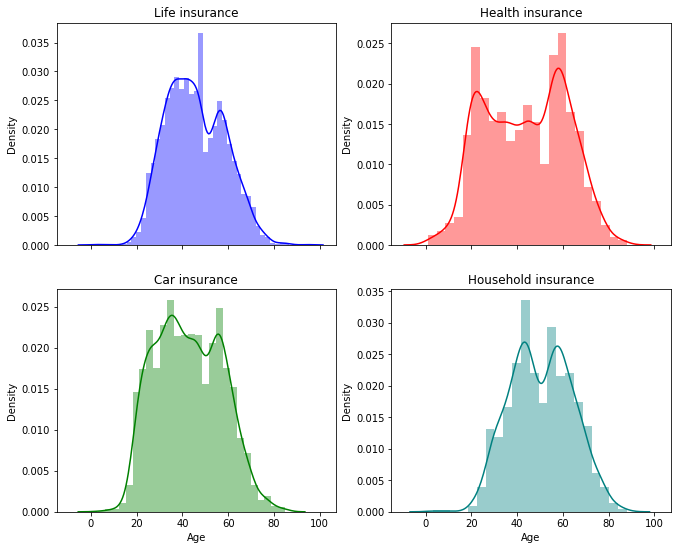

In [16]:
# Plot age density by product type
f, axes = plt.subplots(2, 2, figsize=(11, 9), sharex=True)
sns.distplot( df["Age"][df.Product == "Life"] , color="blue", ax=axes[0, 0]).set_title('Life insurance')
sns.distplot( df["Age"][df.Product == "Health"] , color="red", ax=axes[0, 1]).set_title('Health insurance')
sns.distplot( df["Age"][df.Product == "Car"] , color="green", ax=axes[1, 0]).set_title('Car insurance')
sns.distplot( df["Age"][df.Product == "Household"] , color="teal", ax=axes[1, 1]).set_title('Household insurance')

The faceted histograms show distribution across the different insurance types. This is easier to view than overlapping histograms.

In this case, all 4 histograms show a dip around age 50, suggesting that the dip in the combined histogram is *not* caused by a combination of different distributions - at least, not when divided by insurance type.

The most notable finding here is that health insurance is taken out by a wider age range than the other insurance types.

We now move on to look at the distribution of contract sums.

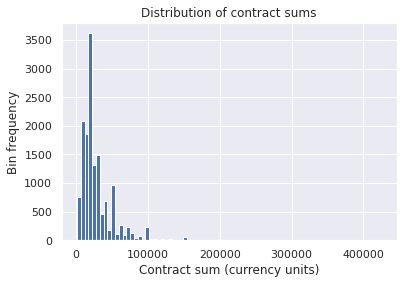

In [36]:
# Contract sum as histogram
plt.figure()
plt.hist(df['Contract sum'], bins=80)
plt.title('Distribution of contract sums')
plt.xlabel('Contract sum (currency units)')
plt.ylabel('Bin frequency')
plt.show()

In the descriptive statistics section above, we identified the median (50th percentile) as 20,000; the 75th percentile as 33,000; and the maximum as 425,000. Therefore it is no surprise to see the histogram with most values towards the left of the distribution and a long right-hand tail, similar to the **Poisson distribution**.

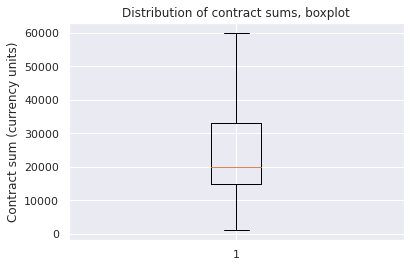

In [38]:
# Box plot
plt.boxplot(df['Contract sum'], showfliers=False)
plt.title('Distribution of contract sums, boxplot')
plt.ylabel('Contract sum (currency units)')
plt.show()

The graph above shows the same data plotted as a boxplot, with clear visualisation of the median, interquartile range, and "minimum" and "maximum" - but not the true minimum and maximum, but rather the quartiles plus and minus 1.5 x the interquartile range. Outliers are not shown for clarity.

## Conclusions

In this paper we have conducted an initial exploration of the dataset. We have examined the data quality of the dataset and described the variables statistically, and through graphics. Further analysis could explore the relationships between the variables more closely, for example asking how contract sum varies according to age, specifically for farmers from a certain region.

Subject to the objectives of any further analysis, it might be desirable to construct a more **up-to-date** dataset with a wider range of attributes, plus a clear **data dictionary**. We can use the current attributes to compare the consumer profiles across different insurance products. However, to gain insights and draw applicable conclusions on each project, a more granular level of data is required. For example, pricing health insurance is linked to people's health conditions, while the insurance company would be more interested in people's driving behaviours when pricing car insurance.  

Moving beyond descriptive statistics and graphics, further analysis could model the data as a **supervised learning** problem, predicting contract sum based on the attributes. There are many techniques for this, for example producing a decision tree.